<a href="https://colab.research.google.com/github/klopetx/PHM_tutorial/blob/main/src/CursoCorto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

!python src/00_Environment_Checks.py

indicator_file_path = "data/indicators.csv"

if not os.path.isdir(project_path):
  print('Indicator dataset not found, extracting indicators...')
  !python src/01_Indicator_extraction.py
  print('Indicators extracted succesfully!')

import sys
sys.path.append('src')
import feature_selection_auxiliars as FS_aux

Cloning into 'PHM_tutorial'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 221 (delta 49), reused 0 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (221/221), 4.52 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (115/115), done.
The '10. FEMTO Bearing' directory does not exist inside 'data'
Runnning data download...
FEMTO downloaded
Indicator dataset not found, extracting indicators...
Indicators extracted succesfully!


In [2]:
import pandas as pd
import numpy as np

indicators = pd.read_csv( "data/indicators.csv", sep = '\t')
indicators.head()

,Origin,Bearing,OperatingCondition,TestNumber,TestIdx,Hour,Minute,Second,Mili/centisecond,Mean,...,BPFO_rms,BPFI_max,BPFI_rms,BSF_max,BSF_rms,Timestamp,Duration,Actual_RUL,RUL,Alive
0,Full_Test_Set,Bearing2_4,2,4,1,8,3,36,462540.0,0.006552,...,3.462482,2.702957,2.455653,15.180564,13.488451,2000-01-01 08:03:36,0.0,1390,1390.0,True
1,Full_Test_Set,Bearing2_4,2,4,2,8,3,46,462540.0,0.001299,...,5.925823,5.629765,4.592479,18.305801,13.007734,2000-01-01 08:03:46,10.0,1390,1380.0,True
2,Full_Test_Set,Bearing2_4,2,4,3,8,3,56,462540.0,0.003271,...,3.938765,6.103561,4.583218,9.434037,8.430699,2000-01-01 08:03:56,20.0,1390,1370.0,True
3,Full_Test_Set,Bearing2_4,2,4,4,8,4,6,462540.0,0.003263,...,2.652722,6.837217,6.077246,13.578691,10.908141,2000-01-01 08:04:06,30.0,1390,1360.0,True
4,Full_Test_Set,Bearing2_4,2,4,5,8,4,16,462540.0,0.004246,...,3.710252,8.133538,6.903766,12.933754,9.514291,2000-01-01 08:04:16,40.0,1390,1350.0,True


In [3]:
indicators.columns

Index(['Origin', 'Bearing', 'OperatingCondition', 'TestNumber', 'TestIdx',
       'Hour', 'Minute', 'Second', 'Mili/centisecond', 'Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms', 'Timestamp', 'Duration', 'Actual_RUL', 'RUL',
       'Alive'],
      dtype='object')

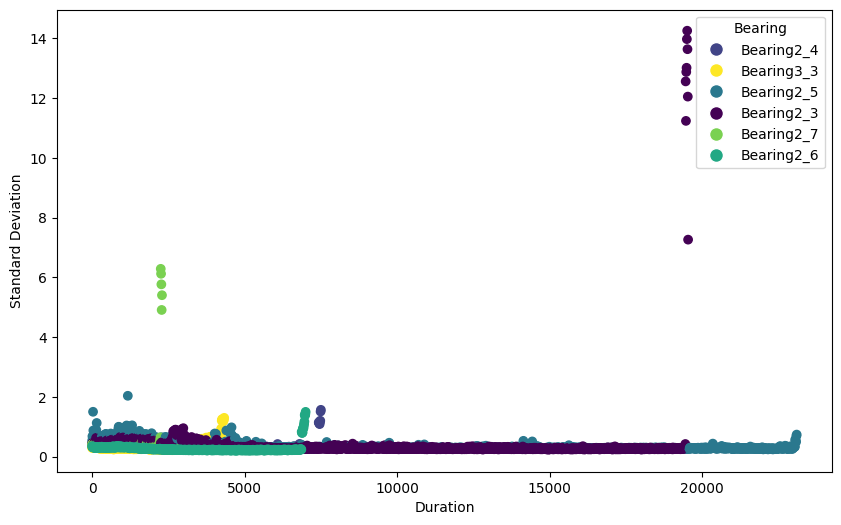

In [4]:
target_variable = 'Standard Deviation' # select one from indicators.columns

FS_aux.plot_indicator_by_bearing(indicators, target_variable)


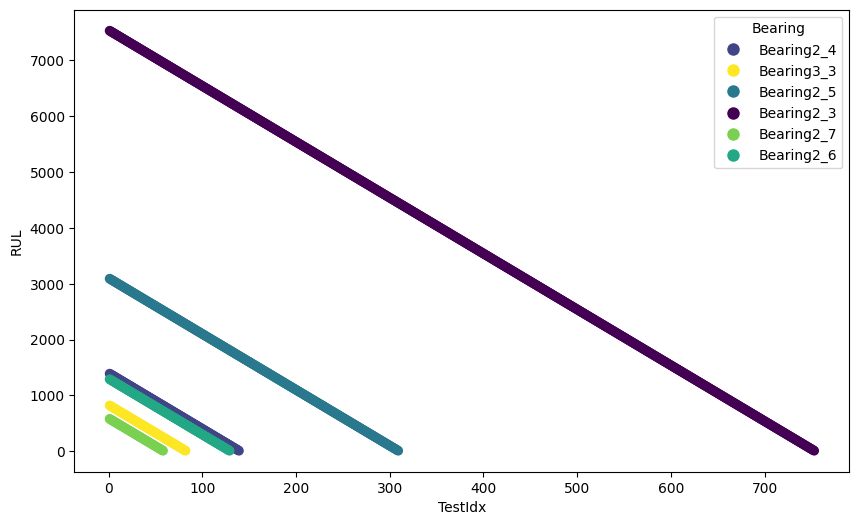

In [5]:
indicators_alive = indicators.loc[indicators['Alive'] == True].copy()


FS_aux.plot_indicator_vs_indicator(indicators_alive,'TestIdx', 'RUL')

# Análisis valores NAs

- Consulta cuantos NA hay en el conjunto
-

# Análisis Outliers
- Consulta si hay outliers en el conjunto de datos
- Trata de eliminarlos

# Análisis exploratorio

- Compara distribuciones de varios rodamientos para una misma variable
- Realiza una matríz de correlaciones
- Realiza unox boxplot o violin plot de alguna variable para los distintos rodamientos.
-

# Modelado

¿Qué modelo podríamos usar para estimar el RUL?

- Trata de modelar la variable RUL usando solo los indicadores
- Prueba varios modelos (recuerda que tienen que ser modelos de regresión)
- Prueba a combinar un [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) o una [selección de variables](https://www.datacamp.com/tutorial/sklearn-linear-regression)
- Emplea una métrica adecuada para modelar
- Visualizar el resultado


In [6]:
indicator_names = ['Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms']

# Despliegue

Ahora que ya tienes un modelo entrenado, guárdalo en formato pickle.

¿Serías capaz de hacer funcionar la siguiente función?

In [7]:

import numpy as np
import pandas as pd

def predict_bearing_RUL(path_to_target_acc_csv_file):

  # Read the file
  rawdf = pd.read_csv(path_to_target_acc_csv_file, header=None)

  # Extract indicators (Feature extraction from a raw signal)


  # Feature engineering (if you applied any)


  # Use model to predict (load model and use it to predict RUL value)




  RUL = np.random.randint(100)

  return RUL


path_to_target_acc_csv_file = "/content/PHM_tutorial/data/10. FEMTO Bearing/Full_Test_Set/Bearing3_3/acc_00009.csv"

predict_bearing_RUL(path_to_target_acc_csv_file)


57

In [8]:
# Una pista: Checkead 01_Indicator_extraction.py

import sys
sys.path.append('./src')

from feature_extraction_auxiliars import process_raw_signals

